# Random Forest 
   Step1:Divide the dataset into X and Y variables
   

In [21]:
%matplotlib inline
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd


In [2]:
#Import The data
X=pd.read_csv("/Users/Arati/Documents/UIS/FALL2016/DataScience/DataSet/train.csv")
y=X.pop("Survived")

In [4]:
X.describe()


//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#FILL THE MISSING AGE WITH THE MEAN VALUE OF AGE
X["Age"].fillna(X.Age.mean(), inplace=True)

In [7]:
X.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#GETTING THE NUMERIC VALUES BY SELECTING THE VARIABLE WHICH ARE NOT OF OBJECT DATATYPE
numeric_variables=list(X.dtypes[X.dtypes!="object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [10]:
#THE FIRST RANDOM FOREST MODEL
model=RandomForestRegressor(n_estimators=100,oob_score=True, random_state=42)
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [11]:
#CALCULATING THE OUT OF BAG SCORE - PREDICTION ERROR IN RANDOM FOREST
model.oob_score_

0.1361695005913669

In [26]:
y_oob = model.oob_prediction_
print("C-Stat:", roc_auc_score(y, y_oob))

C-Stat: 0.73995515504


In [31]:
#WE HAVE APPLIED RANDOM FOREST ONLY ON THE NUMERICAL DATA. LET US APPLY ON THE ENTIRE DATASET WHICH INCLUDES 
#CATEGORICAL DATA TOO
#LET US CLEAN THE CATEGORICAL DATA WITH MISSING VALUES, NULL VALUES AND ASSIGN DUMMY DATA TO THE CATEGORICAL VALUES.

def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))


In [32]:
describe_categorical(X)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Abelson, Mrs. Samuel (Hannah Wizosky)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [35]:
#DROP THE COLUMNS WHICH ARE NOT REQUIRED
X.drop(["Ticket", "PassengerId"], axis=1, inplace=True)

In [36]:
describe_categorical(X)

,Name,Sex,Cabin,Embarked
count,891,891,204,889
unique,891,2,147,3
top,"Abelson, Mrs. Samuel (Hannah Wizosky)",male,B96 B98,S
freq,1,577,4,644


In [37]:
# Change the Cabin variable to be only the first letter or None
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

X["Cabin"] = X.Cabin.apply(clean_cabin)

In [41]:

categorical_variables=["Name", "Sex", "Embarked"]
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

KeyError: 'Name'

In [43]:
categorical_variables=["Cabin"]
for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [44]:
X

,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T
0,3,22.000000,1,0,7.2500,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,38.000000,1,0,71.2833,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,26.000000,0,0,7.9250,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,35.000000,1,0,53.1000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,35.000000,0,0,8.0500,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,3,29.699118,0,0,8.4583,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,54.000000,0,0,51.8625,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,3,2.000000,3,1,21.0750,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,3,27.000000,0,2,11.1333,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2,14.000000,1,0,30.0708,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
#CREATING A RANDOM FOREST MODEL AGAIN
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print ("C-stat: ", roc_auc_score(y, model.oob_prediction_))

C-stat:  0.869872388926


# VARIABLE IMPORTANCE MEASURES

In [48]:
model.feature_importances_

array([  7.98244087e-02,   8.42514364e-02,   2.32946954e-02,
         6.33906476e-03,   7.87354312e-02,   0.00000000e+00,
         0.00000000e+00,   4.82130804e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.95894428e-05,   1.28224802e-03,   3.98867966e-03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.26983039e-03,   4.07316207e-03,
         0.00000000e+00,   5.45770901e-04,   8.78543516e-04,
         0.00000000e+00,   0.00000000e+00,   2.05518152e-04,
         3.61851688e-04,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.55191524e-03,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   5.95196690e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.55277786e-03,
         3.50041891e-03,

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


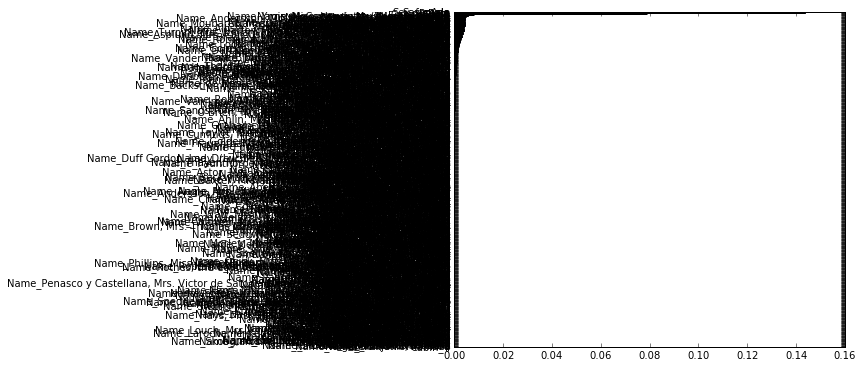

In [51]:
#Plotting the all the variables in the model
feature_importances=pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

In [52]:
#Need to tune the Name variable

# Testing the parameters

In [59]:
#PARAMETERS THAT MAKE A MODEL BETTER ARE

#n_estimators: The number of trees in the forest. Choose as high of a number as your computer can handle.
#max_features: The number of features to consider when looking for the best split. Try ["auto", "None", "sqrt", "log2", 0.9, and 0.2]
#min_samples_leaf: The minimum number of samples in newly created leaves.Try [1, 2, 3]. If 3 is the best, try higher numbers such as 1 through 10.

In [60]:
#PARAMETERS THAT MAKE IT EASIER TO TARIN THE MODEL ARE:
#n_jobs: Determines if multiple processors should be used to train and test the model. 
#Always set this to -1 and %%timeit vs. if it is set to 1. It should be much faster (especially when many trees are trained).

In [66]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
letters = string.ascii_letters

In [89]:
#N_JOBS
#%timeit sum(model.fit(X, y))

model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)
%timeit

30 trees
C-stat:  0.856789058256

50 trees
C-stat:  0.864205519871

100 trees
C-stat:  0.869872388926

200 trees
C-stat:  0.873696460337

500 trees
C-stat:  0.87076183172

1000 trees
C-stat:  0.868833818

2000 trees
C-stat:  0.870261187273



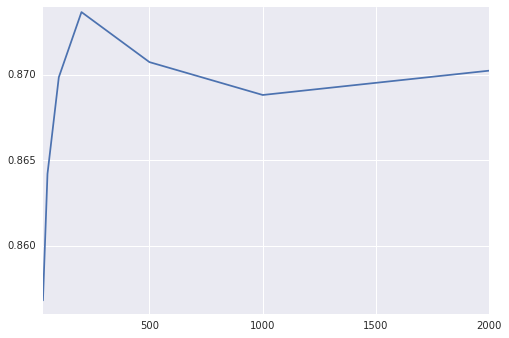

In [91]:
#N_esitmators
#WHEN THE TREE SIZE IS 500 WE GET MAXIMUM AUC SCORE 
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print(trees, "trees") 
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc) 
    results.append(roc)
    print("")
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.868833818

None option
C-stat:  0.868833818

sqrt option
C-stat:  0.870868351815

log2 option
C-stat:  0.868114807358

0.9 option
C-stat:  0.868269261496

0.2 option
C-stat:  0.873696460337



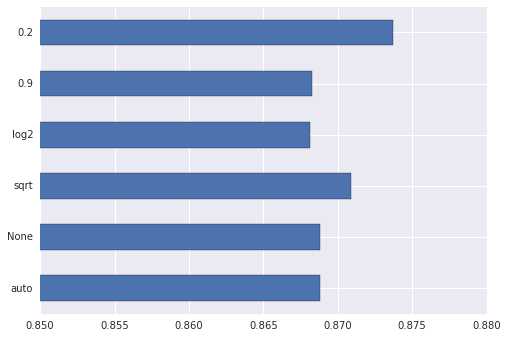

In [93]:
#MAX FEATURES
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print(max_features, "option") 
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc) 
    results.append(roc)
    print("") 
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  0.868833818

2 min samples
C-stat:  0.869582121667

3 min samples
C-stat:  0.871534102408

4 min samples
C-stat:  0.873648526294

5 min samples
C-stat:  0.874370199938

6 min samples
C-stat:  0.873869555492

7 min samples
C-stat:  0.87326239095

8 min samples
C-stat:  0.871898933734

9 min samples
C-stat:  0.869321147434

10 min samples
C-stat:  0.867302591634



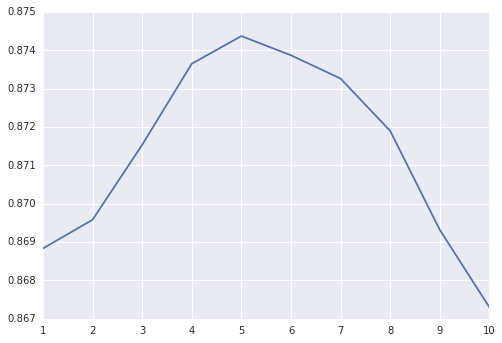

In [94]:
#MIN_SAMPLE_LEAVES
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print(min_samples, "min samples") 
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc) 
    results.append(roc)
    print("") 
    
pd.Series(results, min_samples_leaf_options).plot();

# FINAL RANDOM FOREST MODEL

In [99]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print("C-stat: ", roc) 

C-stat:  0.874370199938
